<a href="https://colab.research.google.com/github/Rosalesmariana/Simulacion-I-/blob/main/Estimacion_pi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Estimación del número pi**

*Solución analitica*

Si consideramos la variable


podemos calcular el valor esperado $E[x]$ y la varianza $Var[x]$. Estos cálculos nos proporcionarán una mejor comprensión de la precisión y el comportamiento de nuestra estimación de $π$ mediante el método de Montecarlo


El valor esperado $E[x]$ de una variable binaria $x$ que toma el valor $1$ con probabilidad $p$ y el valor $0$ con probabilidad $1-p$ es simplemente $p$
En este caso, $p$ es la probabilidad de que un punto aleatorio caiga dentro del círculo. Esta probabilidad es igual a la razón entre el área del círculo y el área del cuadrado.

El area del circulo es $π r^2$
El area del cuadrado es $4 r^2$

Por lo tanto, la probabilidad $p$ es:

$$p=\frac{A_{ciculo}}{A_{cuadrado}}$$
$$p=\frac{π r^2}{4 r^2}= \frac{\pi}{4}$$

La varianza de una variable binaria $x$ con probabilidad $p$ de ser $1$ y $1-p$ de ser 0 está dada por:

$$Var(x)=p(1-p)$$

Si sustituimos $p= \frac{\pi}{4}$

$$Var(x)=\frac{\pi}{4}(1-\frac{\pi}{4})$$
$$Var=\frac{\pi(4-\pi)}{16}$$


Ahora

El valor esperado de $\bar{x}$, la media de $N$ observaciones de $x$, es también $\frac{\pi}{4}$ debido a la linealidad del valor esperado:

$E[\bar{x}]= E[\frac{1}{N} \sum^{N}_{i=1} x_i ]$

$E[\bar{x}]= E[\frac{1}{N} \sum^{N}_{i=1} E[x_i]$

$E[\bar{x}]=\frac{1}{N} N \frac{\pi}{4}$

Por lo tanto la estimacion de $\pi$ es

$E[\pi_{estimada}]= E[ 4 \bar{x}]= 4E[\bar{x}]= 4(\frac{\pi}{4}) = \frac{\pi}{4}$

La varianza de $\bar{x}$ es

$ Var= Var(\frac{1}{N} \sum^{N}_{i=1} x_i )$

$\frac{1}{N^2} \sum^{N}_{i=1} Var(x_i)$

$\frac{1}{N^2}* N *Var(x) = \frac{1}{N} * \frac{\pi(4 - \pi)}{16}$

La varianza de la estimacion de $\pi$ es

$Var(\pi_{estimada})= Var (4\bar{x})= 4^2 Var(\bar{x})=  \frac{\pi(4 - \pi)}{N}$

La varianza de la estimación disminuye a medida que aumentamos el número de puntos $N$, lo que implica que la precisión de la estimación mejora con un mayor número de puntos.

**Solucion por simulación**

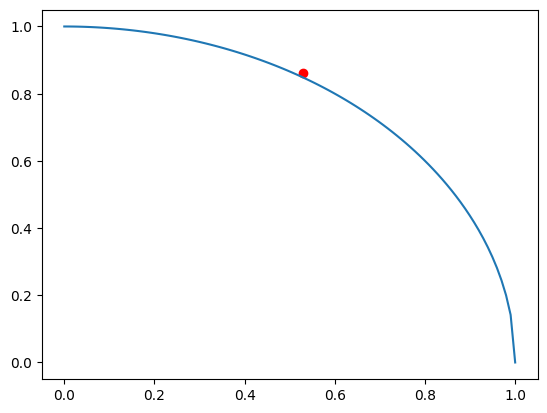

In [2]:
# Grafica para visualizar un previo del experimento
import numpy as np
import random as rnd
import matplotlib.pyplot as plt

x=np.linspace(0,1,100)
u_1=rnd.random()
u_2=rnd.random()

plt.plot(x, np.sqrt(1-x**2))
plt.scatter(u_1, u_2, color="red")
plt.show()

In [11]:
def estimacion_pi(muestras): #Funcion que generara
    exitos = 0

    for i in range(muestras):
     u_1= rnd.uniform (0,1) #Generamos los numeros aleatorios
     u_2= rnd.uniform (0,1)

     if u_2<= np.sqrt(1-(u_1 **2 )): #Con la condicional indicamos si cae dentro del circulo
      exitos +=1 #Se considera como un exito

      valor_estimado= 4*(exitos/muestras) #Valor estimado apartir de el numero de exitos y el tamaño de la muestra

    return valor_estimado

muestras=1000
valor_estimado=estimacion_pi(muestras)
print(valor_estimado)

3.164


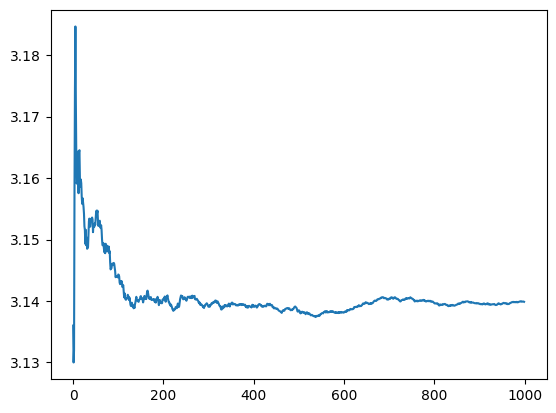

In [14]:
import matplotlib.pyplot as plt

def prob_inter(n): #Funcion para mostrar el estado transitorio y el estado estacionario
    prob = []
    inter = 0
    for i in range(n):
        inter += estimacion_pi(muestras)
        prob.append(inter/(i+1))
    return prob

x=prob_inter(1000)
plt.plot(x) #Podemos sugerir el valor para N a traves de la visualizacion en la grafica

In [ ]:
def prob_inter(n):
    prob = []
    inter = 0
    for i in range(n):
        inter += estimacion_pi(muestras)
        prob.append(inter/(i+1))
    return prob [-1] #Si tomamos el ultimo valor

x=prob_inter(1000)
print(x)

3.1423119999999956


In [ ]:
def simulación(M):
    r=[]
    for i in range (M):
      R=estimacion_pi(500)
      r.append(R)
    return r

(array([  7.,  38.,  91., 177., 244., 243., 128.,  56.,  12.,   4.]),
 array([2.92 , 2.968, 3.016, 3.064, 3.112, 3.16 , 3.208, 3.256, 3.304,
        3.352, 3.4  ]),
 <BarContainer object of 10 artists>)

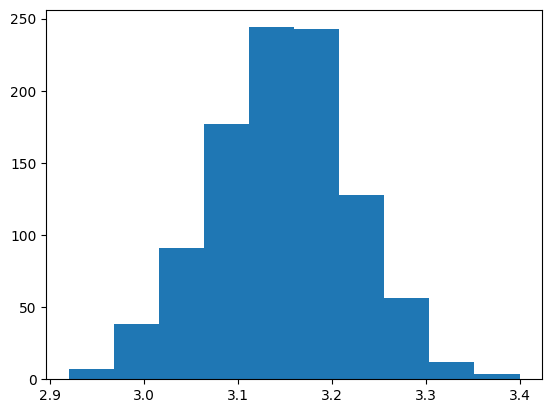

In [ ]:
S=simulación(1000)
plt.hist(S) #Histograma de las muestras

In [ ]:
media=np.mean(x)
media

3.1396119064002916